# Data Analysis

### Load libraries

In [1]:
import torch as tch
import pandas as pd
import scipy as sci
import openpyxl as opxl
import seaborn as sb

### Load CSV

In [2]:
df = pd.read_csv('data.csv', low_memory=False)

### Summary Stats

In [3]:
df.head()

,SCRMCTRL,PPCSWGT,SEQNUM,SEX,AGE,INTTYPE,NONINT,HISP,MODE,PSSTRATA,...,V352A,V352B,V352C,V352D,V352E,V352F,CHECK_ITEM_J,CHECK_ITEM_K,CHECK_ITEM_L,V353
0,2.030020e+18,4150.904836,1.0,(1) Male,(4) 45-64,(2) PPCS Interview - Telephone,NaN,(1) White Only,(0) Computer-assisted personal interviewing,54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.030030e+18,1601.829088,2.0,(2) Female,(3) 25-44,(2) PPCS Interview - Telephone,NaN,(1) White Only,(0) Computer-assisted personal interviewing,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.030030e+18,0.000000,3.0,(1) Male,(1) 16-17,(5) PPCS Noninterview,(5) NCVS Interview Completed by Proxy,(2) Black Only,(0) Computer-assisted personal interviewing,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.030030e+18,0.000000,4.0,(1) Male,(3) 25-44,(5) PPCS Noninterview,(5) NCVS Interview Completed by Proxy,(1) White Only,(0) Computer-assisted personal interviewing,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.030030e+18,1672.290183,5.0,(1) Male,(3) 25-44,(2) PPCS Interview - Telephone,NaN,(2) Black Only,(0) Computer-assisted personal interviewing,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Mapping Race (HISP) and CHECK_ITEM_L

CHECK_ITEM_L is the survey question asked to participants on whether or not they have been arrested before

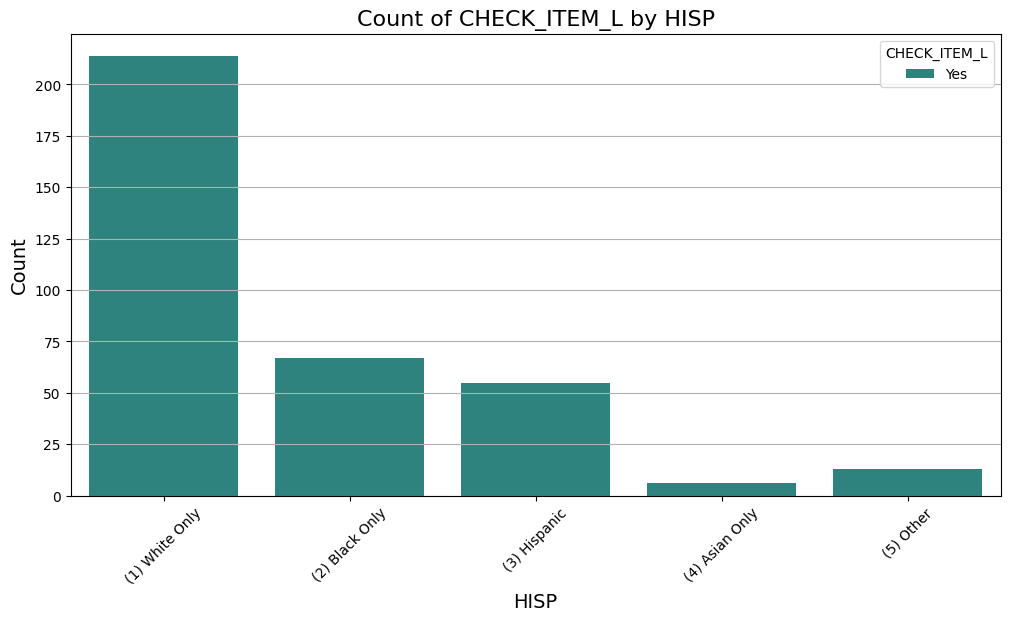

In [9]:
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv', low_memory=False)

# Mapping CHECK_ITEM_L
CHECK_ITEM_L_mapping = {
    '(1) Yes': 1,
    '(2) 2': 2,
    '(9) Out of universe': 9
}

df['CHECK_ITEM_L'] = df['CHECK_ITEM_L'].astype(str).map(CHECK_ITEM_L_mapping)
df['CHECK_ITEM_L'] = pd.to_numeric(df['CHECK_ITEM_L'], errors='coerce')

# Mapping HISP
race_mapping = {
    '(1) White Only': 1,
    '(2) Black Only': 2,
    '(3) Hispanic': 3,
    '(4) Asian Only': 4,
    '(5) Other': 5
}

df['HISP'] = df['HISP'].astype(str).map(race_mapping)
df['HISP'] = pd.to_numeric(df['HISP'], errors='coerce')

# Drop NaN values for the plot
df_filtered = df.dropna(subset=['CHECK_ITEM_L', 'HISP'])

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='HISP', hue='CHECK_ITEM_L', palette='viridis')

# Add titles and labels
plt.title('Count of CHECK_ITEM_L by HISP', fontsize=16)
plt.xlabel('HISP', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(len(race_mapping)), labels=race_mapping.keys(), rotation=45)

# Add the legend explicitly with unique labels
unique_labels = df_filtered['CHECK_ITEM_L'].dropna().unique()
label_names = {1: 'Yes', 2: '2', 9: 'Out of universe'}
plt.legend(title='CHECK_ITEM_L', labels=[label_names.get(label, str(label)) for label in unique_labels])

plt.grid(axis='y')
plt.show()

This plot, generated from the 2018 Police-Public Contact Survey, displays the count of interactions where respondents answered “Yes” to a specific question (CHECK_ITEM_L), categorized by race (HISP). The survey investigates civilian experiences with law enforcement. The highest count is observed among White individuals, which is consistent with their larger representation in the dataset. In contrast, racial groups such as Asians and others have significantly fewer “Yes” responses. This chart highlights racial differences in certain law enforcement-related interactions, suggesting possible disparities in how different groups experience or report these encounters.

## Race arrests by SEX with SCRMCTRL as Count Variable

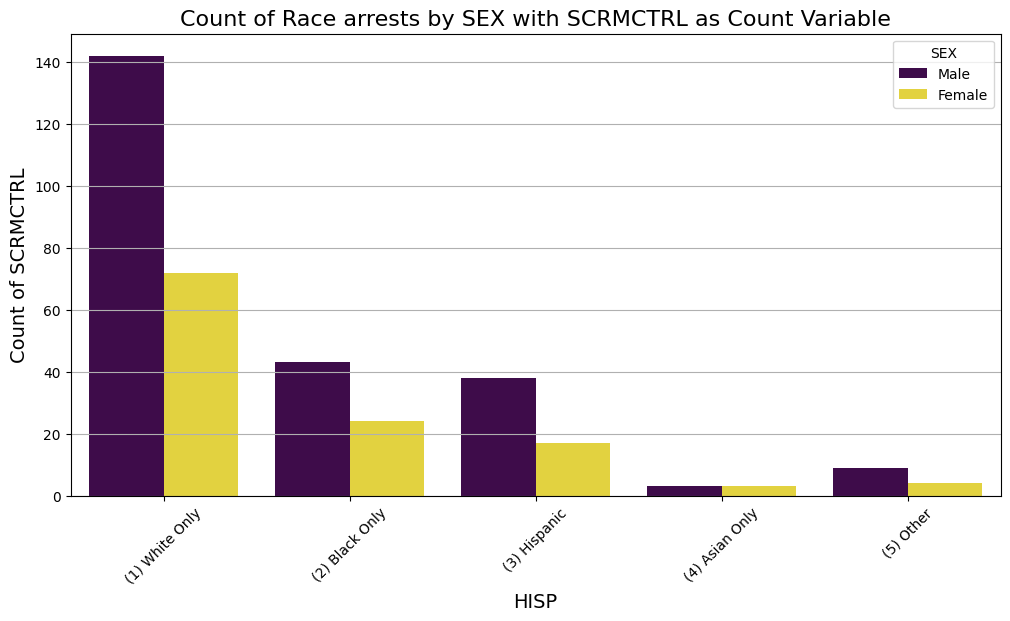

In [8]:
df = pd.read_csv('data.csv', low_memory=False)

# Mapping CHECK_ITEM_L
CHECK_ITEM_L_mapping = {
    '(1) Yes': 1,
    '(2) 2': 2,
    '(9) Out of universe': 9
}

df['CHECK_ITEM_L'] = df['CHECK_ITEM_L'].astype(str).map(CHECK_ITEM_L_mapping)
df['CHECK_ITEM_L'] = pd.to_numeric(df['CHECK_ITEM_L'], errors='coerce')

# Mapping HISP
race_mapping = {
    '(1) White Only': 1,
    '(2) Black Only': 2,
    '(3) Hispanic': 3,
    '(4) Asian Only': 4,
    '(5) Other': 5
}

df['HISP'] = df['HISP'].astype(str).map(race_mapping)
df['HISP'] = pd.to_numeric(df['HISP'], errors='coerce')

# SEX Mapping
sex_mapping = {
    '(1) Male': 1,   # Male
    '(2) Female': 2, # Female
}

df['SEX'] = df['SEX'].astype(str).map(sex_mapping)
df['SEX'] = pd.to_numeric(df['SEX'], errors='coerce')

# Drop NaN values for the plot
df_filtered = df.dropna(subset=['CHECK_ITEM_L', 'HISP', 'SEX', 'SCRMCTRL'])

# Create a count plot with SCRMCTRL as the count variable
plt.figure(figsize=(12, 6))

# Count the occurrences of SCRMCTRL and use it to plot
sns.countplot(data=df_filtered, x='HISP', hue='SEX', palette='viridis', dodge=True)

# Add titles and labels
plt.title('Count of Race arrests by SEX with SCRMCTRL as Count Variable', fontsize=16)
plt.xlabel('HISP', fontsize=14)
plt.ylabel('Count of SCRMCTRL', fontsize=14)
plt.xticks(ticks=range(len(race_mapping)), labels=race_mapping.keys(), rotation=45)

# Add the legend explicitly with unique labels for SEX
plt.legend(title='SEX', labels=['Male', 'Female'])

plt.grid(axis='y')

# Save the plot as a PNG file
plt.savefig('arrests_histogram_baruga.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

This plot, based on the 2018 Police-Public Contact Survey dataset, shows the count of arrests (SCRMCTRL) across different racial categories (HISP), segmented by gender (SEX). The survey, conducted by the U.S. Bureau of Justice Statistics, examines public interactions with law enforcement, such as police stops and arrests. The higher arrest count for White males can be attributed to the fact that White individuals make up the largest racial group in the dataset. The data reveals notable racial and gender disparities in arrests, with arrest counts for females across all racial categories being lower than for males.